In [29]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import pandas as pd
from library import *

start, stop = 500, 10000
n_runs = 100
a, b = 0, 1
step_size = 20

In [30]:
def importance_sampling(function, a, b, iters):
    alfa, betax = 2.9, 1
    x = beta.rvs(alfa, betax, size=iters)
    y = function(x) / beta.pdf(x, alfa, betax)
    return np.mean(y)

In [31]:
f = lambda x: x**2
rg = np.arange(start, stop, step_size)
direct = np.zeros((len(rg), n_runs))
control = np.zeros((len(rg), n_runs))
impor = np.zeros((len(rg), n_runs))
strat = np.zeros((len(rg), n_runs))
anti = np.zeros((len(rg), n_runs))
times = []
for n in range(len(rg)):
    for run in range(n_runs):
        direct[n, run] = direct_sampling(f, a, b, n+1)
        control[n, run] = control_variates(f, a, b, n+1)
        impor[n, run] = importance_sampling(f, a, b, n+1)
        strat[n, run] = stratified_sampling(f, a, b, n+1)
        anti[n, run] = antithetic_sampling(f, a, b, n+1)

direct_var = np.var(direct, axis=1)
control_var = np.var(control, axis=1)
impor_var = np.var(impor, axis=1)
strat_var = np.var(strat, axis=1)
anti_var = np.var(anti, axis=1)
        

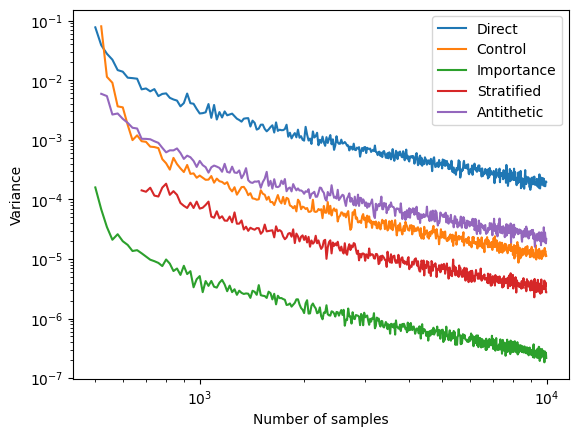

In [32]:
plt.figure()
plt.loglog(rg, direct_var, label='Direct')
plt.loglog(rg, control_var, label='Control')
plt.loglog(rg, impor_var, label='Importance')
plt.loglog(rg, strat_var, label='Stratified')
plt.loglog(rg, anti_var, label='Antithetic')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Variance')
plt.show()

In [36]:
# Print the last variance in a table
data = np.array([direct_var[-1], control_var[-1], impor_var[-1], strat_var[-1], anti_var[-1]])
df = pd.DataFrame(data, index=['Direct', 'Control', 'Importance', 'Stratified', 'Antithetic'], columns=['Variance'])

df

,Variance
Direct,1.958390e-04
Control,1.130950e-05
Importance,2.178635e-07
Stratified,2.760237e-06
Antithetic,2.148987e-05
